# Simulation

Simulation might be useful in several ways. It is a tool to generate data for our analysis. Thus, we can use it to either filling missing information or generate more data. By simulating data with a similar distribution, we are able to represent more accuratly the reality.  

We are going to use numpy to simulate continuous distributions. 
You can check the distributions that you can simulate with: 
- [numpy](https://docs.scipy.org/doc/numpy-1.16.0/reference/routines.random.html). 
- [spacy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html) 

You can find more examples [here](https://bigdata-madesimple.com/how-to-implement-these-5-powerful-probability-distributions-in-python/). 

First of all, we need to set a value for the seed, so each time we get the same random numbers.

In [1]:
import numpy as np
np.random.seed(seed=101)

## Normal distribution
A normal distribution is symmetric about the mean, where data near the mean is more frequent in occurrence than data far from the mean. It has a bell shape. In order to create a normal distribution we need the value for the mean and the standard deviation.   

In this example, we are going to use the iris data from the library sklearn. And we are going to simulate the distribution for one of the columns: 'sepal width (cm)'.

Load the data iris from sklearn.datasets and show the columns' names 

In [46]:
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

Let's visualize the histogram for 'sepal width (cm)' variable

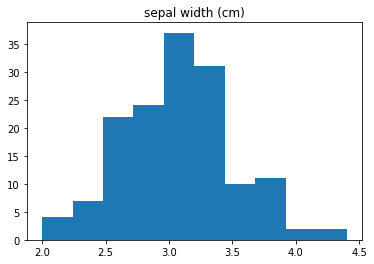

In [47]:
import matplotlib.pyplot as plt
plt.hist(df['sepal width (cm)'])
plt.title('sepal width (cm)')
plt.show()

As we can see in the graph, the shape is similar to a normal distribution. So, we are goin got simulate it and plot both distributions to compare them.

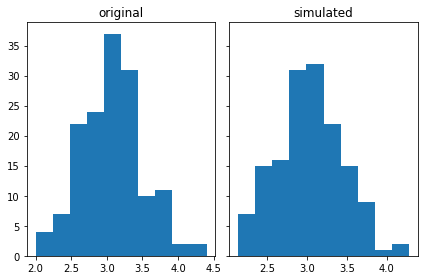

In [48]:
mu, sigma = df['sepal width (cm)'].mean(), df['sepal width (cm)'].std() # mean and standard deviation
s = np.random.normal(mu, sigma, df['sepal width (cm)'].shape[0])

n_bins = 10
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(df['sepal width (cm)'], bins=n_bins)
axs[0].set_title('original')
axs[1].hist(s, bins=n_bins)
axs[1].set_title('simulated')
plt.show()

Great! They are pretty similar! Now, if we want to choose a random number from the distribution, we can use random.choice function. 

In [9]:
np.random.choice(s)

3.276933992907332

## Truncated normal

A truncated normal distribution is a variation of the normal distribution, but the random variables are bound from either below or above, or both. We are going to use for this example, the boston data from sklearn library. Specially we are going to simulate values for 'DIS' variable.    

So, First load the data and show the columns. 

In [50]:
from sklearn.datasets import load_boston
data = load_boston(return_X_y=False)
df = pd.DataFrame(data.data, columns=data.feature_names)
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

Plot the historgram for the variable 'DIS'. And print the values for min, max, mean, and standard deviation.

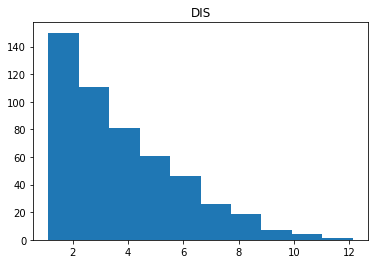

Mean: 3.795042687747034 Standar deviation: 2.1057101266276104 Min: 1.1296 Max: 12.1265 Size: 506


In [261]:
plt.hist(df['DIS'])
plt.title('DIS')
plt.show()
print('Mean:', df['DIS'].mean(), 'Standar deviation:', df['DIS'].std(), 'Min:', df['DIS'].min(), 'Max:', df['DIS'].max(), 'Size:', df['DIS'].shape[0])

Simulate with a normal distribution and a truncated normal distribution the values for this variable. Compare them in a graph agains the original values.

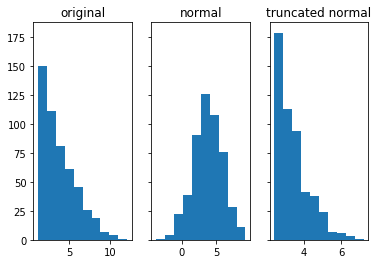

In [300]:
import scipy.stats as stats
import math

lower, upper = df['DIS'].min(), df['DIS'].max()
mu, sigma = df['DIS'].mean(), df['DIS'].std()
a = (lower - mu) / sigma

s = np.random.normal(mu, sigma, df['DIS'].shape[0])
X = stats.truncnorm(lower,np.inf, loc=mu, scale=sigma)

fig, ax = plt.subplots(1, 3, sharey=True)
ax[0].hist(df['DIS'], bins=10)
ax[0].set_title('original')
ax[1].hist(s, bins=10)
ax[1].set_title('normal')
ax[2].hist(X.rvs(df['DIS'].shape[0])-mu, bins=10)
ax[2].set_title('truncated normal')
plt.show()